# Budget Runner

In [1]:
import openpyxl
import math
import io
import os
import json
import calendar

import pandas as pd
import numpy as np

import csv
from csv import DictReader
from openpyxl import Workbook, load_workbook
from datetime import date, datetime
from pathlib import Path
from itertools import chain
import matplotlib.pyplot as plt

In [ ]:
# first_fiscal = "2023-01-01"
# last_fiscal = "2023-12-31"

In [2]:
%load_ext autoreload
%autoreload 2

## Github Link

To view the repository, click the link here: https://github.com/Aaron-M-R/Budget

## Purpose
After having a bank account for quite some time, I decided to keep better track of my spending. While many people either manually look at every charge in their card's history or don't look at all, I wanted to automatically sort my spending and sum the charges based on category. I then created this project in order to do just that. I focused mainly on finding a way to see how much money I spent on food or on transportation and also keep track of my income. I also wanted to easily visualize my spending over time. This program can do all of that.


## Instructions
First, make sure you have cloned the respository called Budget (click [here](https://github.com/Aaron-M-R/Budget) to access). Then, add a spreadsheet of your spending as an excel workbook to the repo. The columns of the spreadsheet should be in the following order: date, status, type, check number, description, withdrawal, deposit, running balance. You should now be able to either run the program (titled BudgeJudy.py) in a terminal or open and run the jupyter notebook (titled BudgetRunner.ipynb) remotely on your machine. Restarting the kernel and running all of the cells in the notebook will first run the python program, and then provide some additional visualizations.


## Use
Enter the name of your excel workbook, pick the range of dates you want to analyze and enter their day, month and year separately. Then, enter what you want the title of your new sheet you to be. The program will then update the excel workbook by making opening a new sheet and filling it with you spending per month on each category. The program then creates a bar plot of total spending on each category and subcategory. Finally, you will be asked if you want to visualize your spending over time, where the program can create a lineplot showing the progression of your spending per month on some or all of the categories of interest. 


To begin, enter the name of your excel workbook.
spending
Would you like to rename this sheet from 'original'? (Y/N))
n


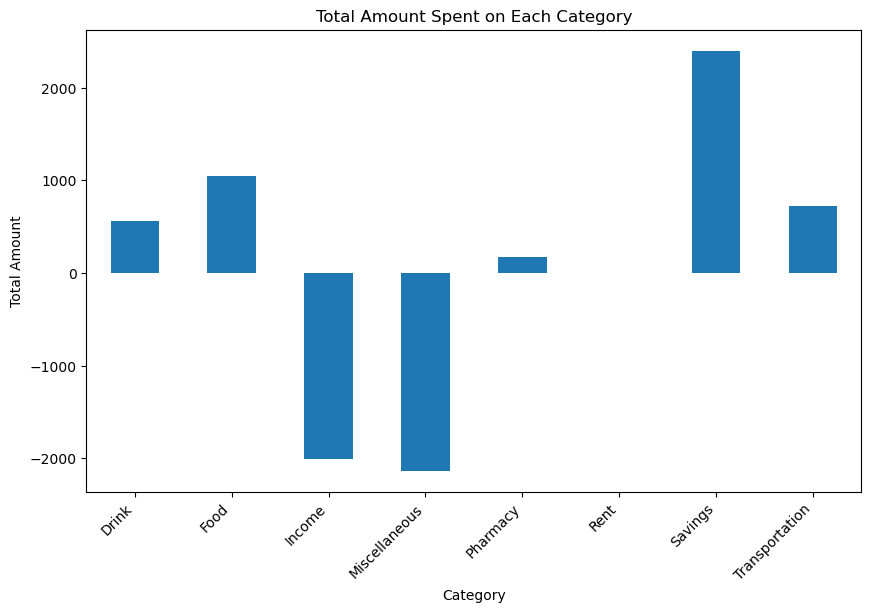

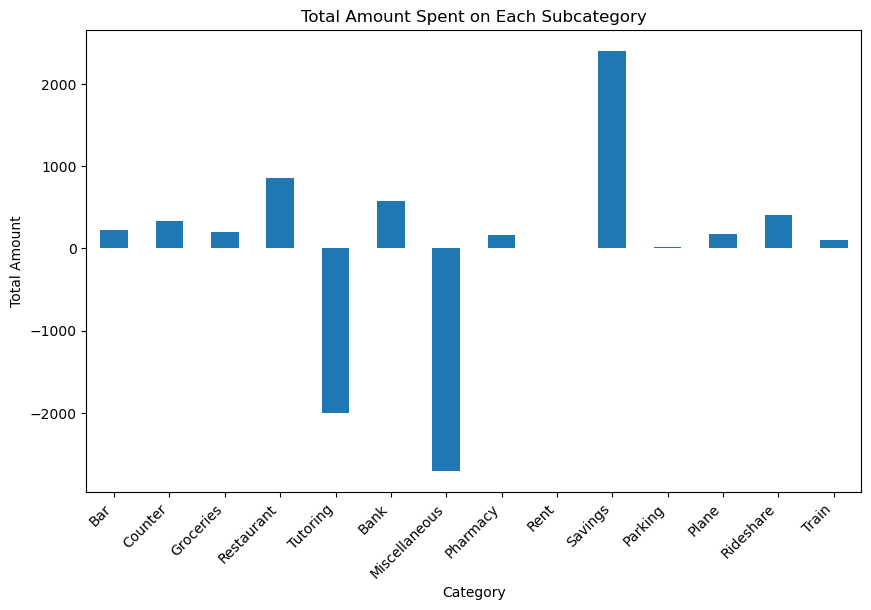

Would you like to visualize your spending over time? (Y/N)
n


In [3]:
from BudgeJudy import *

### Read in spreadsheet from data folder

In [4]:
df.head()

,Date,Category,Subcategory,Code,Amount,RunningBalance,Year,Month,Day
0,2023-12-27,Miscellaneous,Miscellaneous,INTADJUST,134.00,175.64,2023,12,27
1,2023-12-22,Miscellaneous,Miscellaneous,INTADJUST,-56.92,41.64,2023,12,22
2,2023-12-22,Miscellaneous,Miscellaneous,INTADJUST,-129.00,98.56,2023,12,22
3,2023-12-21,Miscellaneous,Miscellaneous,INTADJUST,-23.98,227.56,2023,12,21
4,2023-12-20,Savings,Savings,TRANSFER,-499.32,251.54,2023,12,20


In [8]:
totals

Month                         January  February    March   April     May  \
Category       Subcategory                                                 
Drink          Bar               0.00      0.00   -39.53  -37.69    0.00   
               Counter         -44.16      0.00   -60.93  -24.00  -69.73   
Food           Groceries        -6.67    -14.48   -61.58    0.00  -20.82   
               Restaurant      -54.54    -19.77   -19.07  -56.85 -188.11   
Income         Tutoring          0.00      0.00     0.00    0.00    0.00   
Miscellaneous  Bank           -199.67    -19.86   -18.92  -58.89  -38.91   
               Miscellaneous  -106.48    -74.80  3476.46 -146.88 -173.02   
Pharmacy       Pharmacy         -2.54    -15.95   -22.92  -29.58  -53.01   
Rent           Rent              0.00      0.00     0.00    0.00    0.00   
Savings        Savings           0.00      0.00     0.00    0.00    0.00   
Transportation Parking           0.00      0.00   -15.00   -4.25   -4.00   
               Plane             0.00      0.00     0.00    0.00    0.00   
               Rideshare         0.00    -31.26     0.00  -67.80 -182.10   
               Train             0.00    -72.00   -31.00    0.00    0.00   

Month                           June    July  August  September  October  \
Category       Subcategory                                                 
Drink          Bar            -36.58  -23.20    0.00     -52.10   -30.94   
               Counter        -44.57  -28.27    0.00      -3.54   -48.43   
Food           Groceries      -68.91    0.00    0.00      -7.42    -2.49   
               Restaurant    -124.51  -66.70    0.00    -109.59   -80.69   
Income         Tutoring         0.00    0.00    0.00       0.00   348.44   
Miscellaneous  Bank           -79.24  -59.25  -39.24       0.29     0.15   
               Miscellaneous   94.92  349.80  -66.71    -187.81   -57.46   
Pharmacy       Pharmacy        -5.99    0.00    0.00      -6.99    -5.84   
Rent           Rent             0.00    0.00    0.00       0.00     0.00   
Savings        Savings          0.00    0.00    0.00   -1000.00  -250.00   
Transportation Parking          0.00    0.00    0.00       0.00     0.00   
               Plane         -150.00    0.00    0.00       0.00     0.00   
               Rideshare      -59.73    0.00    0.00     -70.12     0.00   
               Train            0.00    0.00    0.00       0.00     0.00   

Month                         November  December    Total  
Category       Subcategory                                 
Drink          Bar                0.00      0.00  -220.04  
               Counter          -11.84     -4.35  -339.82  
Food           Groceries          0.00    -15.99  -198.36  
               Restaurant       -68.73    -63.09  -851.65  
Income         Tutoring         962.03    694.49  2004.96  
Miscellaneous  Bank             -59.90      0.00  -573.44  
               Miscellaneous   -234.09   -166.94  2706.99  
Pharmacy       Pharmacy         -25.06      0.00  -167.88  
Rent           Rent               0.00      0.00     0.00  
Savings        Savings         -649.23   -499.32 -2398.55  
Transportation Parking            0.00      0.00   -23.25  
               Plane              0.00    -30.00  -180.00  
               Rideshare          0.00      0.00  -411.01  
               Train              0.00      0.00  -103.00

### For updating categories

In [6]:
# Upload categories, subcategories and codes as JSON object to file

# path = Path("Data") / "category_descriptions.json"
# with open(path, "w") as outfile: 
#     json.dump(categories, outfile)

In [7]:
# Read in category descriptions of charges

# filepath = Path('Data') / 'category_descriptions.json'
# categories = json.loads(filepath.read_text())
# categories